In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as m
df=pd.read_csv('Houseprice.csv')

In [2]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [11]:
a=df.isnull().sum()
a[a>0]

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
SalePrice       1459
dtype: int64

<AxesSubplot:>

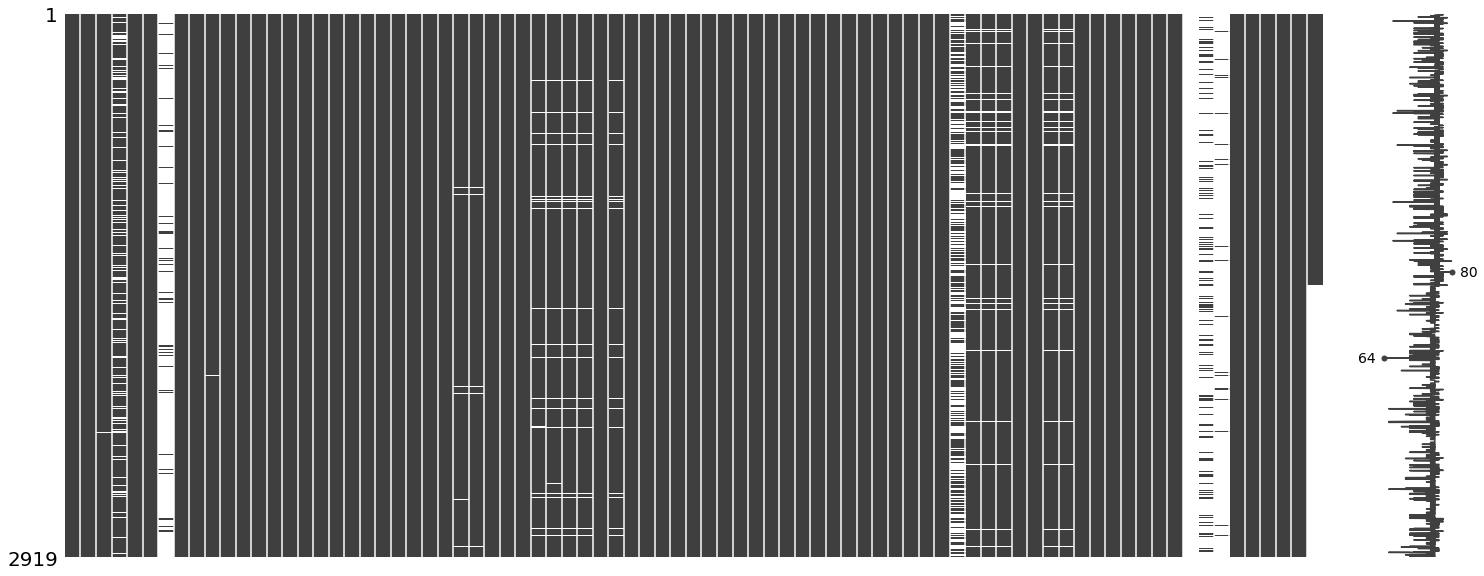

In [3]:
m.matrix(df)

In [12]:
df.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'],axis=1,inplace=True)

In [13]:
df.shape

(2919, 76)

In [14]:
df.corr().tail(1)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
SalePrice,-0.021917,-0.084284,0.351799,0.263843,0.790982,-0.077856,0.522897,0.507101,0.477493,0.38642,...,0.324413,0.315856,-0.128578,0.044584,0.111447,0.092404,-0.02119,0.046432,-0.028923,1.0


In [15]:
df.drop(['Id','BsmtFinSF2','LowQualFinSF','BsmtHalfBath','MiscVal','YrSold'],axis=1,inplace=True)

In [16]:
df.shape

(2919, 70)

In [2]:
a=[i for i in df.columns if (df[i].dtype=='object')]
a

NameError: name 'df' is not defined

In [18]:
c=df[a].isnull().sum()
c[c>0]

MSZoning          4
Utilities         2
Exterior1st       1
Exterior2nd       1
MasVnrType       24
BsmtQual         81
BsmtCond         82
BsmtExposure     82
BsmtFinType1     79
BsmtFinType2     80
Electrical        1
KitchenQual       1
Functional        2
GarageType      157
GarageFinish    159
GarageQual      159
GarageCond      159
SaleType          1
dtype: int64

In [19]:
from sklearn.impute import SimpleImputer 
x=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
x=x.fit(df[['MSZoning','Utilities','Exterior1st','Exterior2nd','MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','KitchenQual','Functional','GarageType','GarageFinish','GarageQual','GarageCond','SaleType']])
df[['MSZoning','Utilities','Exterior1st','Exterior2nd','MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','KitchenQual','Functional','GarageType','GarageFinish','GarageQual','GarageCond','SaleType']]=x.transform(df[['MSZoning','Utilities','Exterior1st','Exterior2nd','MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','KitchenQual','Functional','GarageType','GarageFinish','GarageQual','GarageCond','SaleType']])

In [20]:
df.isna().sum()

MSSubClass          0
MSZoning            0
LotFrontage       486
LotArea             0
Street              0
                 ... 
PoolArea            0
MoSold              0
SaleType            0
SaleCondition       0
SalePrice        1459
Length: 70, dtype: int64

In [21]:
b=[i for i in df.columns if (df[i].dtypes!='object')]

In [22]:
b

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MoSold',
 'SalePrice']

In [23]:
s=df[b].isnull().sum()
s[s>0]

LotFrontage      486
MasVnrArea        23
BsmtFinSF1         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
GarageYrBlt      159
GarageCars         1
GarageArea         1
SalePrice       1459
dtype: int64

In [25]:
m=SimpleImputer(missing_values=np.nan,strategy='mean')
m=m.fit(df[['SalePrice','GarageArea','GarageCars','GarageYrBlt','BsmtFullBath','TotalBsmtSF','BsmtUnfSF','BsmtFinSF1','MasVnrArea','LotFrontage']])
df[['SalePrice','GarageArea','GarageCars','GarageYrBlt','BsmtFullBath','TotalBsmtSF','BsmtUnfSF','BsmtFinSF1','MasVnrArea','LotFrontage']]=m.transform(df[['SalePrice','GarageArea','GarageCars','GarageYrBlt','BsmtFullBath','TotalBsmtSF','BsmtUnfSF','BsmtFinSF1','MasVnrArea','LotFrontage']])

In [26]:
df.isna().values.any()

False

In [27]:
from sklearn.preprocessing import LabelEncoder as l
l=l()

In [28]:
ab=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition']

In [29]:
for i in ab:
    df[i]=l.fit_transform(df[i])

In [44]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,3,3,0,4,0,...,0,61,0,0,0,0,2,8,4,208500.00000
1,20,3,80.0,9600,1,3,3,0,2,0,...,298,0,0,0,0,0,5,8,4,181500.00000
2,60,3,68.0,11250,1,0,3,0,4,0,...,0,42,0,0,0,0,9,8,4,223500.00000
3,70,3,60.0,9550,1,0,3,0,0,0,...,0,35,272,0,0,0,2,8,0,140000.00000
4,60,3,84.0,14260,1,0,3,0,2,0,...,192,84,0,0,0,0,12,8,4,250000.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,4,21.0,1936,1,3,3,0,4,0,...,0,0,0,0,0,0,6,8,4,180921.19589
2915,160,4,21.0,1894,1,3,3,0,4,0,...,0,24,0,0,0,0,4,8,0,180921.19589
2916,20,3,160.0,20000,1,3,3,0,4,0,...,474,0,0,0,0,0,9,8,0,180921.19589
2917,85,3,62.0,10441,1,3,3,0,4,0,...,80,32,0,0,0,0,7,8,4,180921.19589


In [45]:
df.shape

(2919, 70)

In [46]:
x=df.iloc[:,df.columns!='SalePrice']
y=df.iloc[:,df.columns=='SalePrice']

In [47]:
from sklearn.model_selection import train_test_split as m
train,test=m(df,test_size=.2)
train_x=train.iloc[:,0:75]
train_y=train.iloc[:,75]
test_x=test.iloc[:,0:75]
test_y=test.iloc[:,75]


IndexError: single positional indexer is out-of-bounds

In [37]:
from sklearn.linear_model import Ridge
e=Ridge(alpha=20)
e=e.fit(train_x,train_y)
predf=e.predict(test_x)
predf

array([-8.28774208e-04,  2.11902030e-03, -3.41771601e-04,  1.40593651e-03,
        2.74827037e-03, -3.97902019e-04, -7.21574134e-04,  1.51407936e-03,
        2.23734868e-03,  7.56504366e-04, -1.12062118e-03, -2.05718599e-03,
       -1.09423191e-03, -1.45053289e-03,  9.48983712e-04, -1.38051256e-03,
        5.24605020e-04,  1.44487341e-03,  2.53283218e-03, -6.12791604e-05,
       -2.12442682e-03, -2.00385496e-03, -1.50810210e-04, -1.15781744e-03,
        2.23857031e-03, -1.07123857e-03, -3.25641839e-03,  1.96302511e-03,
        1.46854871e-03, -9.75968478e-04, -6.52006219e-04, -7.99959419e-04,
        2.00046529e-03,  1.23708496e-04, -1.39737370e-04, -1.50645525e-04,
       -9.59954228e-04,  4.26803367e-04,  2.14597324e-03,  6.09269581e-04,
       -7.97978106e-04, -3.14382425e-03,  1.94583941e-03,  5.52837710e-03,
        1.54966105e-03, -6.70314033e-04, -6.38424289e-04,  3.95225132e-03,
       -7.54417894e-04,  1.52935660e-03,  1.99678378e-03, -6.12693544e-04,
        5.45451281e-04,  

In [38]:
print(e.score(train_x,train_y))
print(e.score(test_x,test_y))

0.011561865750745248


NameError: name 'test_y' is not defined